# Breast Cancer Data Set Cluster Analysis

## Problem Statement   
- To investigate if there are any clusterings in the diagnostic breast cancer data set.

- To investigate which unsupervised machine learning technique can best demonstrate the clusterings present in the data.

***

## Data Set
Breast Cancer Wisconsin (Diagnostic) Data Set
from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
They describe characteristics of the cell nuclei present in the image.

Features can help to determine whether diagnosis is <font color=blue>__*benign*__</font> or <font color=red>__*malignant*__</font>.


### Importing libraries

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')

### Importing data set

In [0]:
dataset = pd.read_csv('breastcancer.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Data set contains 33 columns (features) and 569 rows (data).

No missing values for 32 columns, 1 column (Unnamed: 32) with 569 null values.

All features are numerical except the diagnosis which is categorical.

***


## Data Exploration and Cleaning

Last column is unnamed and null, therefore we need to remove it.

Id cannot be used for the analysis, therefore we can drop it.

In [5]:
dataset.drop('Unnamed: 32', axis=1, inplace=True)
dataset.drop('id', axis=1, inplace=True)
dataset.shape

(569, 31)

In [6]:
dataset.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.082970,0.088900,0.040900,0.04484,0.012840,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
215,M,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,0.2563,1.1940,1.933,22.69,0.005960,0.034380,0.039090,0.014350,0.01939,0.004560,15.75,26.93,104.40,750.1,0.14600,0.43700,0.46360,0.16540,0.3630,0.10590
532,B,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,0.06155,0.2047,0.4801,1.373,17.25,0.003828,0.007228,0.007078,0.005077,0.01054,0.001697,15.85,20.20,101.60,773.4,0.12640,0.15640,0.12060,0.08704,0.2806,0.07782
202,M,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.051210,0.089580,0.024650,0.02175,0.005195,25.12,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762
443,B,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768,0.1818,2.5420,1.277,13.12,0.010720,0.013310,0.019930,0.011110,0.01717,0.004492,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736


Now there are 30 features left.

***
## Data Dictionary

### Dependent Variable : Diagnosis
B: <font color=blue>__*Benign*__</font> (Non cancerous)

M: <font color=red>__*Malignant*__</font>  (Sign of breast cancer)

**Attributes information:**

- ID number: id number of cell nucleus

Attributes include ten characteristics of each cell nucleus:

  - radius: Average of distances from center to points on the perimeter
  - texture: texture of cell
  - perimeter: perimeter of cell
  - area: cross-sectional area of cell
  - smoothness: smoothness of cell
  - compactness: perimeter ^ 2 / area - 1.0
  - concavity: severity of the concave parts of the contour
  - concave points: number of concave parts of the contour
  - symmetry: cellular symmetry
  - fractal_dimension: 'coastline approximation' - 1

Each of the above ten characteristics is recorded for the "mean", "se" and "worst" which refer to the mean, standard error and largest (mean of the 3 largest values) respectively.


#### Bar chart showing the proportion of benign and malignant diagnosis

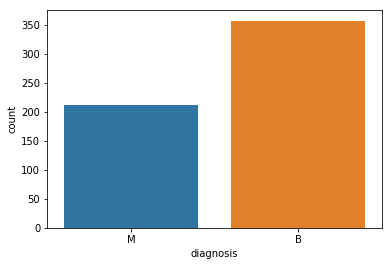

In [7]:
sns.countplot(dataset['diagnosis'],label="Count")

### Data Mapping
B: 0

M: 1

In [0]:
diagnosis_mapping = {
    "B" : 0,
    "M" : 1
}

dataset['diagnosis'] = dataset['diagnosis'].map(diagnosis_mapping)

***

## Data Visualization

### Correlation Table

In [9]:
dataset.iloc[:,1:].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## Correlation Map

We now plot a correlation map for better visualization.

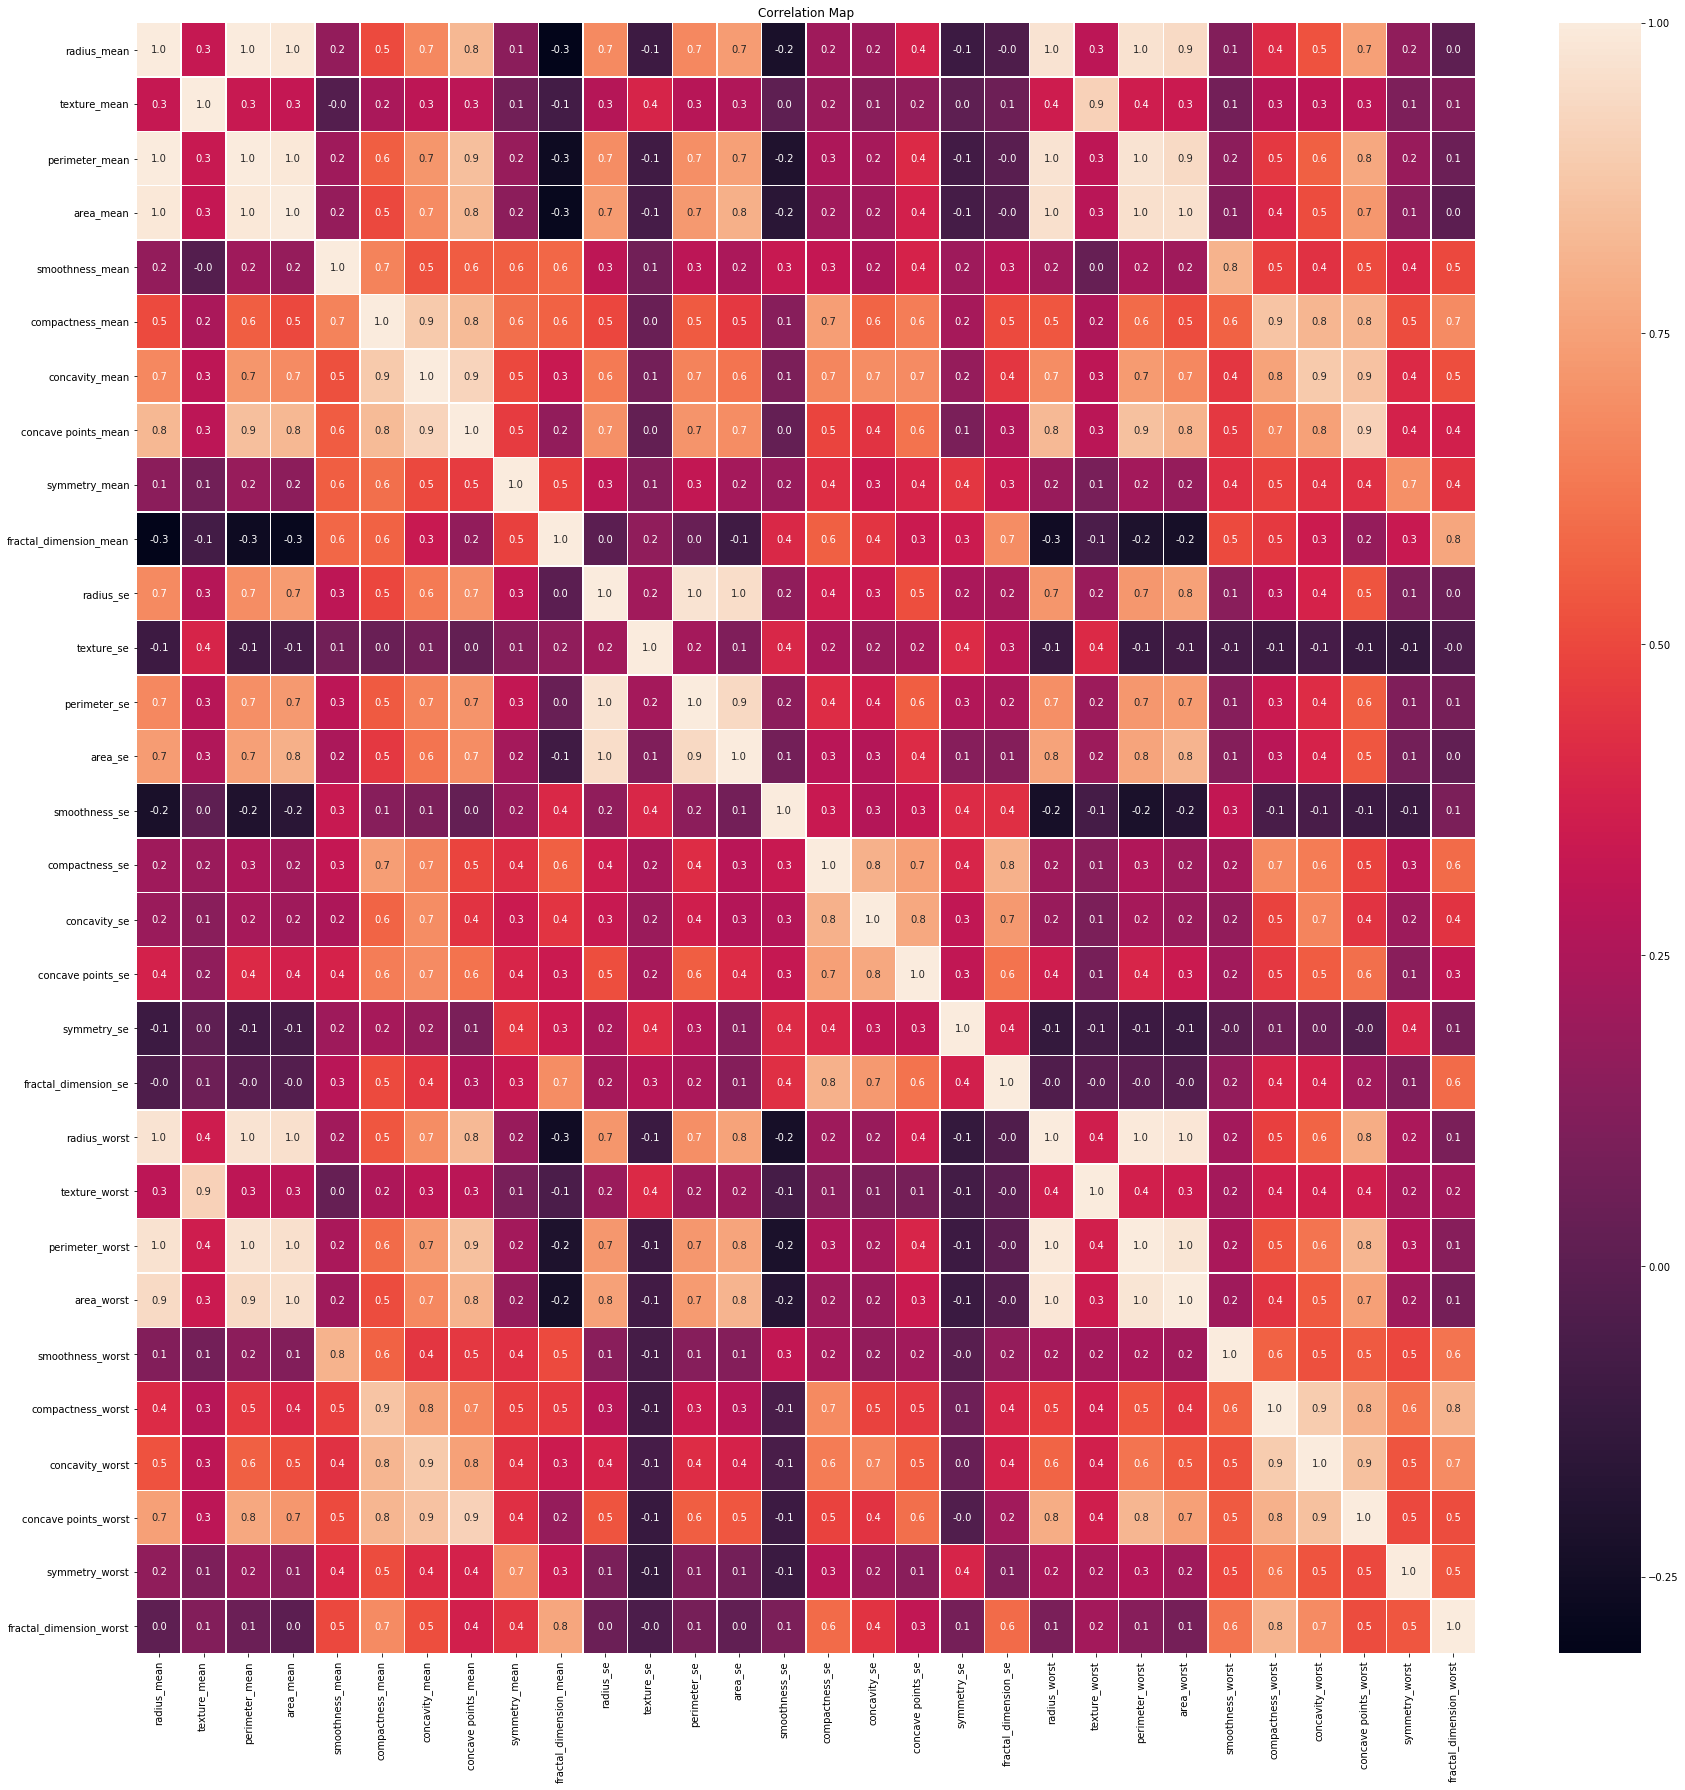

In [10]:
f,ax=plt.subplots(figsize = (30,30))
sns.heatmap(dataset.iloc[:,1:].corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')

plt.show()

As we can see from above, there are many highly correlated variables. 

For example, radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst are highly correlated to each other.

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. Therefore we can remove redundant features.

Moreover, using too many features will make it difficult for us to interpret the clusterings later.

However, before we remove any data, let us test the accuracy if we use all 30 features.

#### Testing our model using the Random Forest method

With all 30 features, we obtain an accuracy of :  0.972027972027972


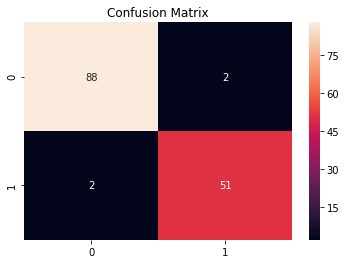

In [11]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,1:31], dataset['diagnosis'], random_state=0)

# random forest classifier with n_estimators=10 (default)
check = RandomForestClassifier(random_state=0)      
check = check.fit(x_train,y_train)

bac = accuracy_score(y_test,check.predict(x_test))
print('With all 30 features, we obtain an accuracy of : ',bac)
plt.title("Confusion Matrix");
cm = confusion_matrix(y_test,check.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

#### Dropping features with correlation greater than 0.80

In [0]:
# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [0]:
# Drop features with correlation greater than 0.80
dataset_corr = dataset.drop(dataset[to_drop], axis=1)

In [14]:
dataset_corr.shape

(569, 14)

Now there are 13 features left.

In [15]:
dataset.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
186,1,18.31,18.58,118.6,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.92,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.1571,0.3206,0.06938
272,1,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,1.1670,1.3520,8.867,156.80,0.005687,0.049600,0.06329,0.015610,0.01924,0.004614,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858
29,1,17.57,15.05,115.0,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,0.6003,0.8225,4.655,61.10,0.005627,0.030330,0.03407,0.013540,0.01925,0.003742,20.01,19.52,134.9,1227.0,0.1255,0.2812,0.2489,0.1456,0.2756,0.07919
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
119,1,17.95,20.01,114.2,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,0.5506,1.2140,3.357,54.04,0.004024,0.008422,0.02291,0.009863,0.05014,0.001902,20.58,27.83,129.2,1261.0,0.1072,0.1202,0.2249,0.1185,0.4882,0.06111


This method might be a bit arbitrary so we try using the Select K Best method to select the best features too.

#### Select features with Select K Best method

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# find the k with the highest accuracy score

for i in range(1,11):
    select_feature = SelectKBest(chi2, k=i).fit(x_train, y_train)

    x_train_2 = select_feature.transform(x_train)
    x_test_2 = select_feature.transform(x_test)

    # random forest classifier with n_estimators=10 (default)
    check2 = RandomForestClassifier(random_state=0)      
    check2 = check2.fit(x_train_2,y_train)
    ac_2 = accuracy_score(y_test,check2.predict(x_test_2))
    print(f'Accuracy for {i} best features is: {ac_2}')

Accuracy for 1 best features is: 0.8881118881118881
Accuracy for 2 best features is: 0.916083916083916
Accuracy for 3 best features is: 0.916083916083916
Accuracy for 4 best features is: 0.9300699300699301
Accuracy for 5 best features is: 0.9440559440559441
Accuracy for 6 best features is: 0.9300699300699301
Accuracy for 7 best features is: 0.9370629370629371
Accuracy for 8 best features is: 0.9440559440559441
Accuracy for 9 best features is: 0.9440559440559441
Accuracy for 10 best features is: 0.951048951048951


We will select the 5 best features because it has the highest accuracy score.

In [17]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

# to get the column names of the columns selected
col_names = x_train.columns[select_feature.get_support(indices=True)]

df_selected = pd.DataFrame(data=x_train_2, columns=col_names)

df_selected.columns

Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')

In [18]:
dataset.shape

(569, 31)

In [19]:
dataset = pd.concat([dataset.iloc[:,0], dataset[df_selected.columns]], axis = 1)
dataset.head()

,diagnosis,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,1,122.80,1001.0,153.40,184.60,2019.0
1,1,132.90,1326.0,74.08,158.80,1956.0
2,1,130.00,1203.0,94.03,152.50,1709.0
3,1,77.58,386.1,27.23,98.87,567.7
4,1,135.10,1297.0,94.44,152.20,1575.0


#### Testing the accuracy again after feature selection

After removing 25 features, we obtain an accuracy of :  0.9440559440559441


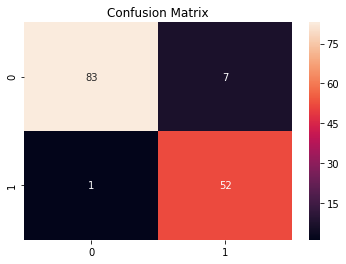

In [20]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,1:14], dataset['diagnosis'], random_state=00)

# random forest classifier with n_estimators=10 (default)
check = RandomForestClassifier(random_state=0)      
check = check.fit(x_train,y_train)

aac = accuracy_score(y_test,check.predict(x_test))
print('After removing 25 features, we obtain an accuracy of : ',aac)
plt.title("Confusion Matrix");
cm = confusion_matrix(y_test,check.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [21]:
print("After removing the columns, the accuracy fell from {} to {}.".format(bac,aac))

After removing the columns, the accuracy fell from 0.972027972027972 to 0.9440559440559441.


***
# Clustering

__Unsupervised techniques used:__
1. K-means
2. Agglomerative (Hierachical)
3. DBScan

### Define x and y

In [0]:
x = dataset.iloc[:, 1:]
y = dataset.loc[:,'diagnosis']

## K-means
First, we try using 2 clusters.

In [0]:
from sklearn.cluster import KMeans

km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = km2.fit_predict(x)

In [24]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_kmeans))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_kmeans))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_kmeans))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_kmeans))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_kmeans))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_kmeans))

Homogeneity: 0.422
Completeness: 0.517
V-measure: 0.465
Adjusted Rand Index: 0.491
Adjusted Mutual Information: 0.422
Silhouette Coefficient: 0.697


The Silhouette Coefficient does not seem to be very good, so we will try to use the elbow plot to obtain a more optimal k.


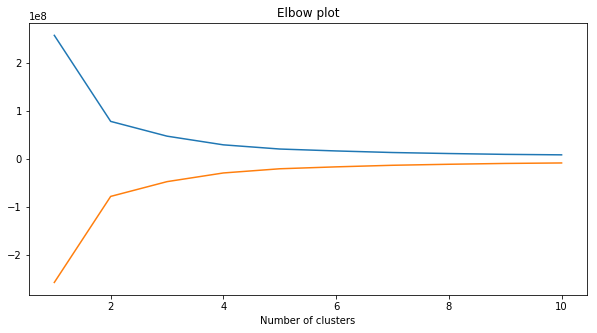

In [25]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []
score = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    score.append(kmeans.score(x))

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), score)
plt.title('Elbow plot')
plt.xlabel('Number of clusters')
plt.show()

From the elbow plot, we determine the elbow to be at k=2, so it seems like k=2 is already the optimal value. Nevertheless, we will find the Silhouette Coefficient for different values of k to see if there is a different insight.

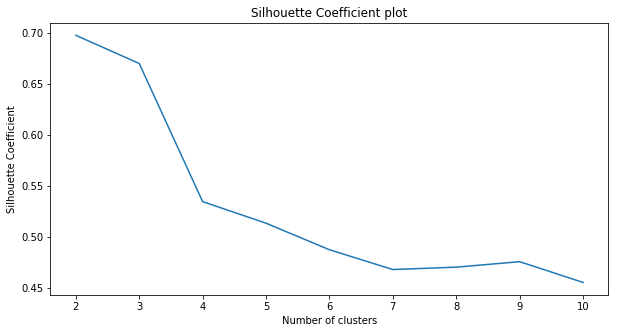

[0.6974919960181906, 0.6698790184791771, 0.5343352652207739, 0.5131431866578826, 0.4870872790740216, 0.4676633006305961, 0.47001046663368384, 0.47536841869186136, 0.45499798057112156]


In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sc = []
    
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(x)
    sc.append(silhouette_score(x, y_kmeans))
    
plt.figure(figsize=(10,5))
plt.plot(range(2, 11), sc)
plt.title('Silhouette Coefficient plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

print(sc)

The plot shows that the Silhouette Coefficient generally decreases with increasing number of clusters, so the optimal value of k is indeed 2.

## Agglomerative

We use the linkage and dendogram function from scipy to visualise the hierarchy.

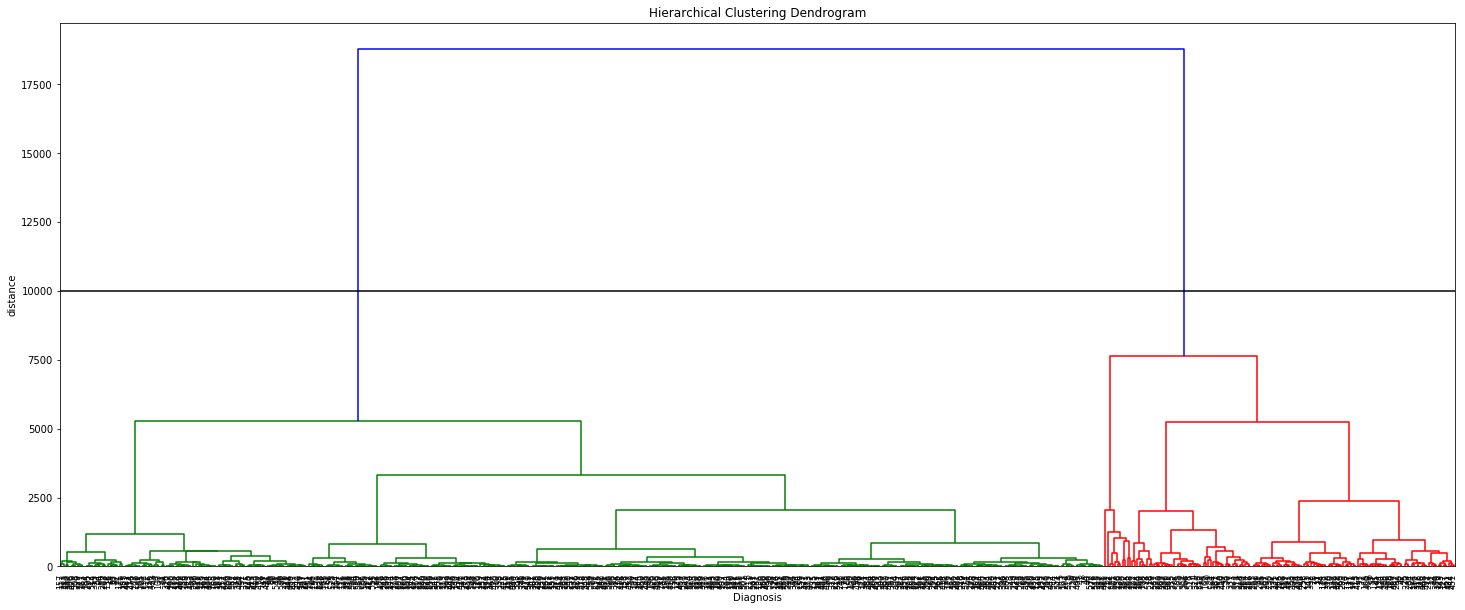

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(x, 'ward')

# set cut-off to 569 cluster merges
max_d = 10000                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Diagnosis')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=569,                  
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

We do agglomerative clustering using different number of clusters (2 to 10), and compute the metrics for each case.

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

row_names = ['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index', 'Adjusted Mutual Information', 'Silhouette Coefficient']
agg_metrics = pd.DataFrame(index=row_names)

for i in range (2, 11):
    clustering = AgglomerativeClustering(linkage="ward", n_clusters=i)
    clustering.fit(x);

    homogeneity = metrics.homogeneity_score(y, clustering.labels_)
    completeness = metrics.completeness_score(y, clustering.labels_)
    v_measure = metrics.v_measure_score(y, clustering.labels_)
    ari = metrics.adjusted_rand_score(y, clustering.labels_)
    ami = metrics.adjusted_mutual_info_score(y, clustering.labels_)
    silhouette = metrics.silhouette_score(x, clustering.labels_)

    data = {i: [homogeneity, completeness, v_measure, ari, ami, silhouette]}
    
    curr_metrics = pd.DataFrame(data, index=row_names)
    agg_metrics = pd.concat([agg_metrics, curr_metrics], axis=1)
    
agg_metrics

,2,3,4,5,6,7,8,9,10
Homogeneity,0.477588,0.477802,0.620806,0.622047,0.635426,0.637192,0.641766,0.641766,0.641766
Completeness,0.559367,0.499262,0.393410,0.343720,0.276822,0.260247,0.221415,0.220736,0.216113
V-measure,0.515253,0.488297,0.481616,0.442778,0.385640,0.369556,0.329240,0.328489,0.323342
Adjusted Rand Index,0.555467,0.538023,0.567576,0.520512,0.323316,0.304519,0.182421,0.182308,0.178258
Adjusted Mutual Information,0.476889,0.476361,0.391833,0.341742,0.274679,0.257779,0.218861,0.217709,0.212747
Silhouette Coefficient,0.686734,0.679145,0.464351,0.476047,0.450300,0.436052,0.439990,0.439239,0.440059


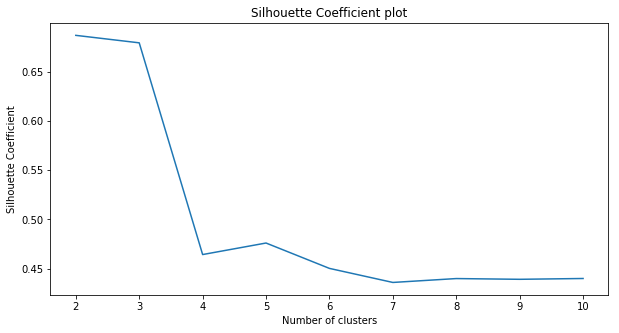

In [29]:
plt.figure(figsize=(10,5))
plt.plot(agg_metrics.columns, agg_metrics.loc['Silhouette Coefficient'])
plt.title('Silhouette Coefficient plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

We can see that for k=2, the metrics are slightly higher for Agglomerative clustering as compared to K-means, other than Silhouette Coefficient which is similar.

As the number of clusters increase, the metrics generally decrease, other than Homogeneity score which increases. The Homogeneity score measures if each cluster only contains members of 1 class. Since there are more clusters, there is higher probability for each cluster to contain only members of 1 class, so it is reasonable that this metric improved.

Thus it seems like Agglomerative clustering has the conclusion as K-means, that the optimal number of clusters is 2.

## DBScan

There are 2 parameters in DBSCAN, eps(epsilon) and minimum number of samples. In order to find out the optimal eps, NN(Nearest-neighbour) method is used.

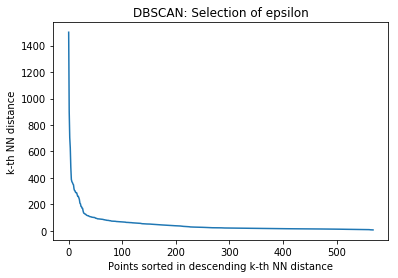

In [30]:
from sklearn.neighbors import NearestNeighbors
ns = 5
nbrs = NearestNeighbors(n_neighbors=ns).fit(dataset)
distances, indices = nbrs.kneighbors(dataset)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)
plt.title('DBSCAN: Selection of epsilon')
plt.xlabel('Points sorted in descending k-th NN distance')
plt.ylabel('k-th NN distance')
plt.show()

As shown above, the optimal eps is found at the sharp turn of the graph, which is approximately 200. Minimum number of samples should be ≥ (Number of features +1). 

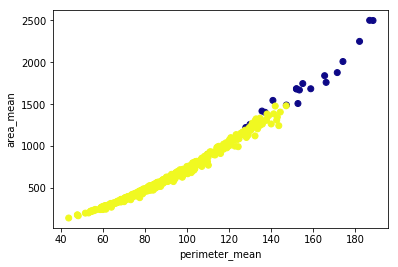

In [31]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=200, min_samples=10)

clusters = dbscan.fit_predict(x)

#plot the cluster assignments
plt.scatter(x.iloc[:,0], x.iloc[:, 1], c=clusters, cmap="plasma")
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])

plt.show()

In [32]:
np.unique(clusters)

array([-1,  0])

In [33]:
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 1
Number of noise sample = 20


As shown above, there is only 1 cluster with 20 noise samples. The outliers, however are shown clearly.

In [34]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, clusters))
print("Completeness: %0.3f" % metrics.completeness_score(y, clusters))
print("V-measure: %0.3f" % metrics.v_measure_score(y, clusters))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, clusters))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, clusters))
# distance-based, not density-based
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, clusters))

Homogeneity: 0.054
Completeness: 0.235
V-measure: 0.088
Adjusted Rand Index: 0.052
Adjusted Mutual Information: 0.053
Silhouette Coefficient: 0.689


The metrics for DBScan are exceptionally bad with most below 0.3 except Silhouette Coefficient. This can be expected since we saw the clustering analysis grouped all points into 1 cluster. 

# PCA

We try to do feature reduction through Principal Component Analysis to see if the clustering will improve after that. We will reduce the 5 features to 2 principal components.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataset[['diagnosis']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,diagnosis
0,1160.145673,-294.132123,1
1,1269.097513,15.541400,1
2,995.753477,39.115113,1
3,-407.183366,-67.350570,1
4,930.342421,189.175519,1


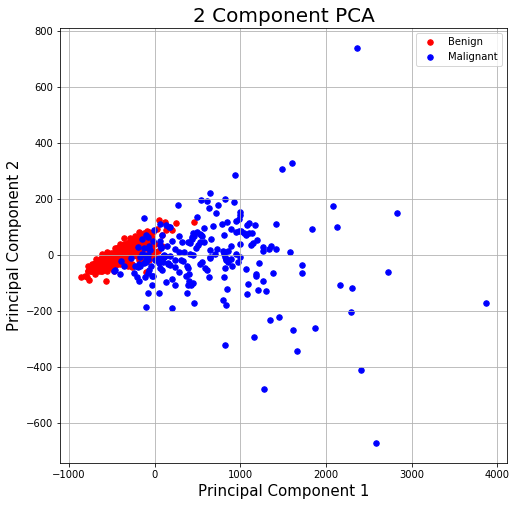

In [36]:
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
diagnosis = ['Benign', 'Malignant']
colors = 'rb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)
ax1.legend(diagnosis)
ax1.grid()

In [37]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.98215993 0.01617559]
0.9983355238528862


The explained variance tells us how much information (variance) can be attributed to each of the principal components. 

Together, the first two principal components contain 99.8% of the information. The first principal component contains 98.2% of the variance and the second principal component contains 1.6% of the variance. Thus it seems like even 1 principal component would be able to capture the variance well.

# After PCA

### Redefine x

In [0]:
x_pca = principalDf

## K-means

In [0]:
from sklearn.cluster import KMeans

km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = km2.fit_predict(x_pca)

In [40]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_kmeans))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_kmeans))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_kmeans))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_kmeans))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_kmeans))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pca, y_kmeans))

Homogeneity: 0.422
Completeness: 0.517
V-measure: 0.465
Adjusted Rand Index: 0.491
Adjusted Mutual Information: 0.422
Silhouette Coefficient: 0.698


For k=2, the metrics did not change other than Silhouette Coefficient which increased slightly from 0.697.

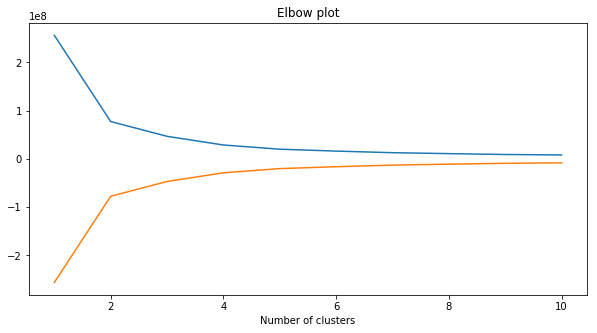

In [41]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []
score = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    score.append(kmeans.score(x_pca))

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), score)
plt.title('Elbow plot')
plt.xlabel('Number of clusters')
plt.show()

The elbow plot did not change from before PCA. We still determine the elbow to be at k=2.

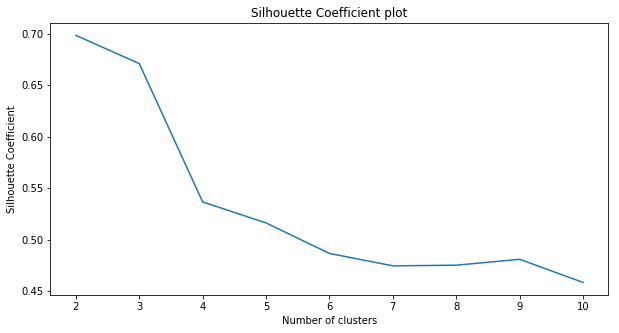

In [42]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sc = []
    
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(x_pca)
    sc.append(silhouette_score(x_pca, y_kmeans))
    
plt.figure(figsize=(10,5))
plt.plot(range(2, 11), sc)
plt.title('Silhouette Coefficient plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

The shape of the Silhouette Coefficient plot did not change from before PCA. From the above findings, it seem like PCA to reduce the 5 features to 2 principal components did not affect K-means clustering much.

## Agglomerative

We use the linkage and dendogram function from scipy to visualise the hierarchy.

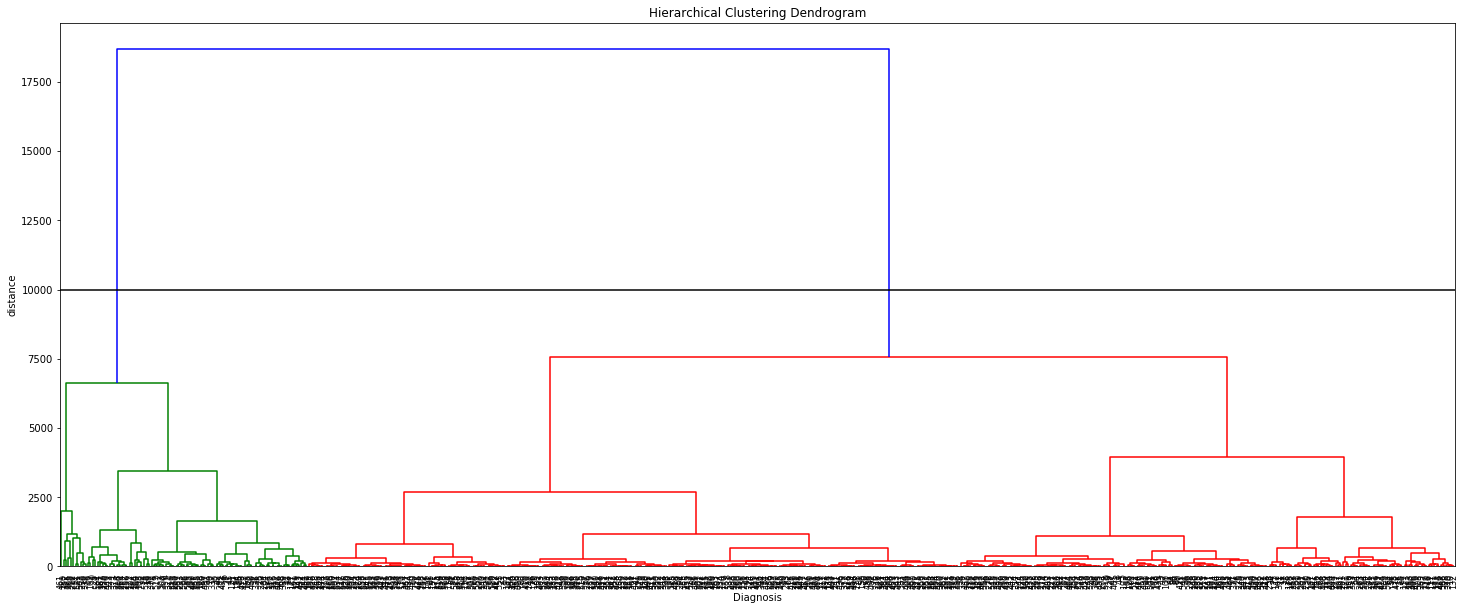

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(x_pca, 'ward')

# set cut-off to 569 cluster merges
max_d = 10000                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Diagnosis')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=569,                  
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

If considering k=2, compared to before PCA, the number of points in each cluster seem to be more imbalanced, i.e. a very big proportion of points in one cluster.

We do agglomerative clustering using different number of clusters (2 to 10), and compute the metrics for each case.

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

row_names = ['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index', 'Adjusted Mutual Information', 'Silhouette Coefficient']
agg_metrics = pd.DataFrame(index=row_names)

for i in range (2, 11):
    clustering = AgglomerativeClustering(linkage="ward", n_clusters=i)
    clustering.fit(x_pca);

    homogeneity = metrics.homogeneity_score(y, clustering.labels_)
    completeness = metrics.completeness_score(y, clustering.labels_)
    v_measure = metrics.v_measure_score(y, clustering.labels_)
    ari = metrics.adjusted_rand_score(y, clustering.labels_)
    ami = metrics.adjusted_mutual_info_score(y, clustering.labels_)
    silhouette = metrics.silhouette_score(x_pca, clustering.labels_)

    data = {i: [homogeneity, completeness, v_measure, ari, ami, silhouette]}
    
    curr_metrics = pd.DataFrame(data, index=row_names)
    agg_metrics = pd.concat([agg_metrics, curr_metrics], axis=1)
    
agg_metrics

,2,3,4,5,6,7,8,9,10
Homogeneity,0.317647,0.551423,0.551423,0.652574,0.652574,0.658454,0.658454,0.662638,0.662638
Completeness,0.448573,0.353514,0.333716,0.324925,0.303186,0.254471,0.253597,0.242534,0.232733
V-measure,0.371924,0.430827,0.415796,0.433837,0.414019,0.367079,0.366168,0.355097,0.344478
Adjusted Rand Index,0.353829,0.405361,0.393762,0.435908,0.416541,0.255924,0.255810,0.245904,0.234697
Adjusted Mutual Information,0.316733,0.352404,0.332063,0.323094,0.300979,0.252119,0.250738,0.239396,0.229311
Silhouette Coefficient,0.697115,0.518875,0.527402,0.478420,0.474810,0.481399,0.481497,0.466060,0.459342


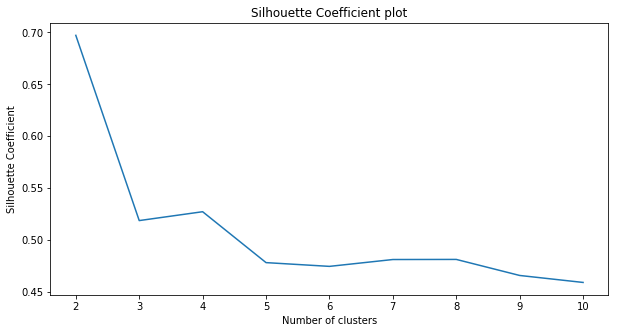

In [45]:
plt.figure(figsize=(10,5))
plt.plot(agg_metrics.columns, agg_metrics.loc['Silhouette Coefficient'])
plt.title('Silhouette Coefficient plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

Other than Silhouette Coefficient which remained relatively similar, the other metrics deproved slightly (up to 0.2) after PCA. The decrement is more obvious for smaller k, until when k > 8, the metrics became an improvement from before PCA.

The shape of the Silhouette Coefficient plot is similar to before PCA, other than for k=3 where it decreased sharply.

## DBScan

There are 2 parameters in DBSCAN, eps(epsilon) and minimum number of samples. In order to find out the optimal eps, NN(Nearest-neighbour) method is used.

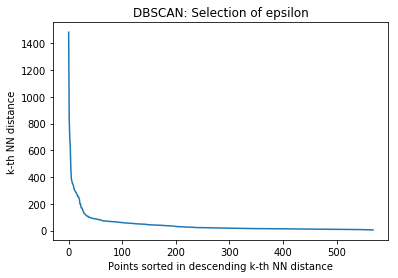

In [46]:
from sklearn.neighbors import NearestNeighbors
ns = 5
nbrs = NearestNeighbors(n_neighbors=ns).fit(finalDf)
distances, indices = nbrs.kneighbors(finalDf)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)
plt.title('DBSCAN: Selection of epsilon')
plt.xlabel('Points sorted in descending k-th NN distance')
plt.ylabel('k-th NN distance')
plt.show()

Similar to before PCA, the optimal eps is found at the sharp turn of the graph, which is approximately 200. Minimum number of samples should be ≥ (Number of features +1). Minimum samples of 5 is used in this case. 

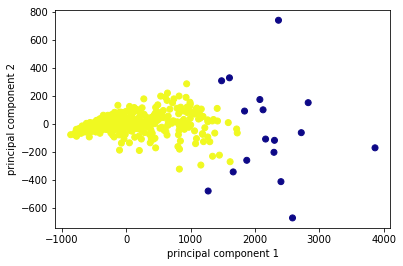

In [47]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=200, min_samples=5)

clusters = dbscan.fit_predict(x_pca)

#plot the cluster assignments
plt.scatter(x_pca.iloc[:,0], x_pca.iloc[:, 1], c=clusters, cmap="plasma")
plt.xlabel(x_pca.columns[0])
plt.ylabel(x_pca.columns[1])

plt.show()

In [48]:
np.unique(clusters)

array([-1,  0])

In [49]:
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 1
Number of noise sample = 17


The result is similar to before PCA, where there is only 1 cluster. However, number of noise samples have decreased slightly to 17.

In [50]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, clusters))
print("Completeness: %0.3f" % metrics.completeness_score(y, clusters))
print("V-measure: %0.3f" % metrics.v_measure_score(y, clusters))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, clusters))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, clusters))
# distance-based, not density-based
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pca, clusters))

Homogeneity: 0.046
Completeness: 0.225
V-measure: 0.076
Adjusted Rand Index: 0.044
Adjusted Mutual Information: 0.045
Silhouette Coefficient: 0.692


The metrics for DBScan did not improve after PCA other than Silhouette Coefficient which increased slightly from 0.450.